In [1]:
import pickle

def save_to_pickle(data,savepath):

    with open(savepath, 'wb') as handle:

        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return None
 
def depickle(savepath):

    with open(savepath, 'rb') as handle:

        b = pickle.load(handle)

    return b
 
import pandas as pd

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import genextreme
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

operating_system = 'win'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

import time_series

custom_library_path_2 = os.path.abspath('util/gev')
sys.path.append(custom_library_path_2)

import data_processing#, vgam_loader

No data for month 11 and day 31
No data for month 2 and day 30
No data for month 2 and day 31
Return Period of Max 38_LOTHAR Wind Gust: 47.34 years for cluster 0


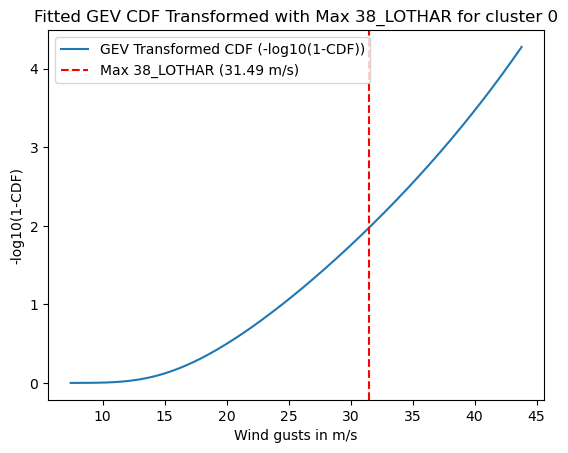

Return Period of Max 38_LOTHAR Wind Gust: 580.30 years for cluster 1


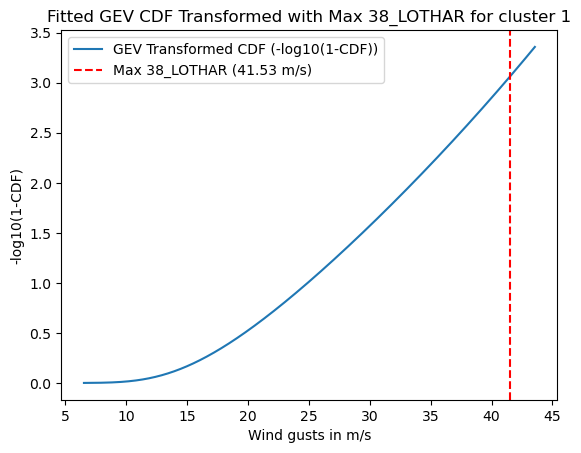

Return Period of Max 38_LOTHAR Wind Gust: 4.49 years for cluster 2


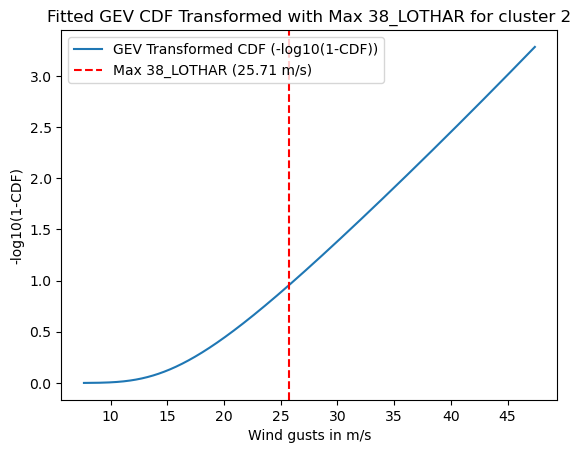

Return Period of Max 38_LOTHAR Wind Gust: 6059.87 years for cluster 3


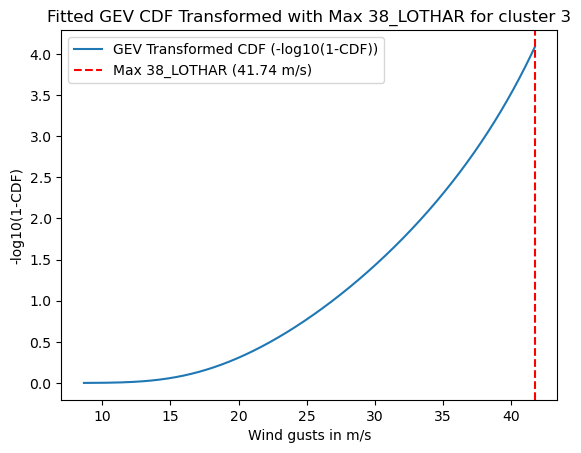

Return Period of Max 38_LOTHAR Wind Gust: 2.52 years for cluster 4


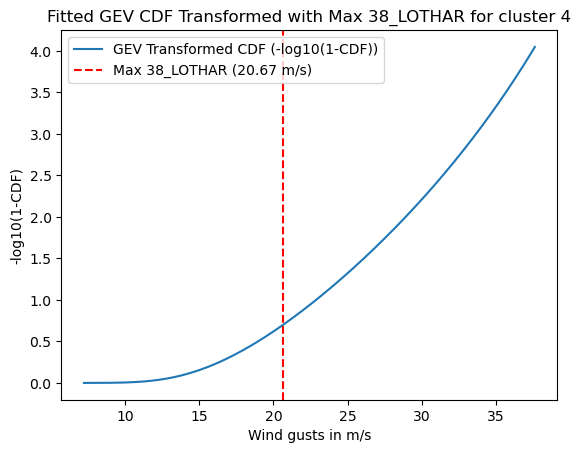

Return Period of Max 38_LOTHAR Wind Gust: 2.83 years for cluster 5


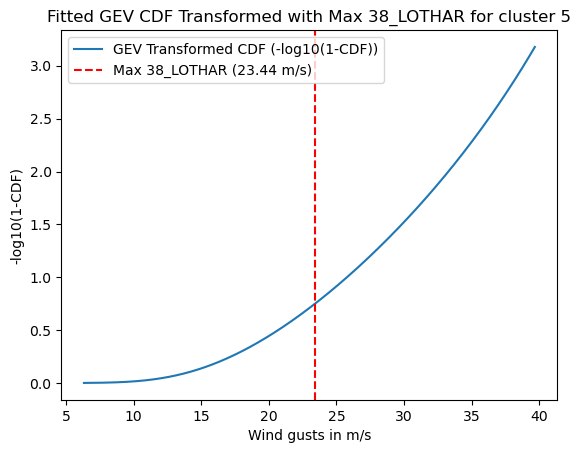

Return Period of Max 38_LOTHAR Wind Gust: 3.29 years for cluster 6


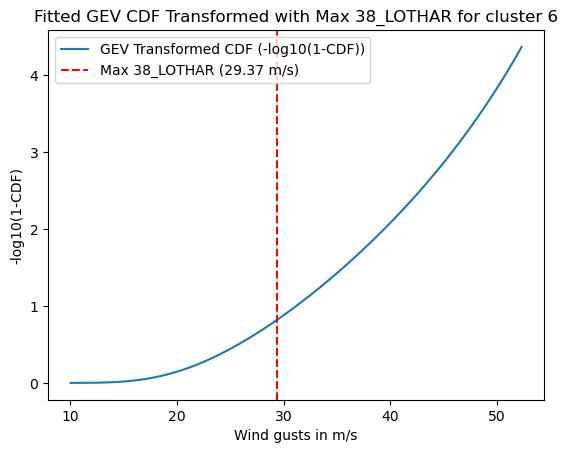

Return Period of Max 38_LOTHAR Wind Gust: 183.33 years for cluster 7


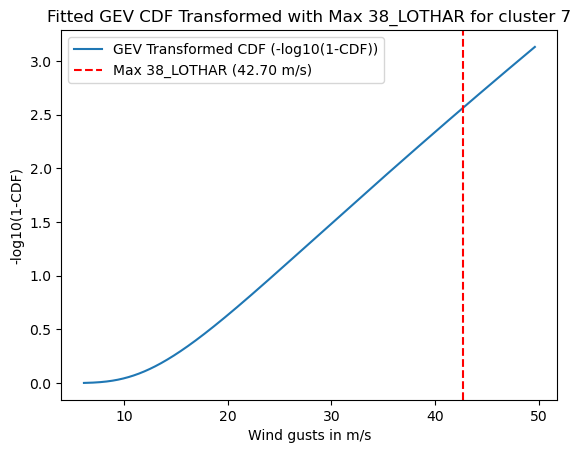

Return Period of Max 38_LOTHAR Wind Gust: 28.65 years for cluster 8


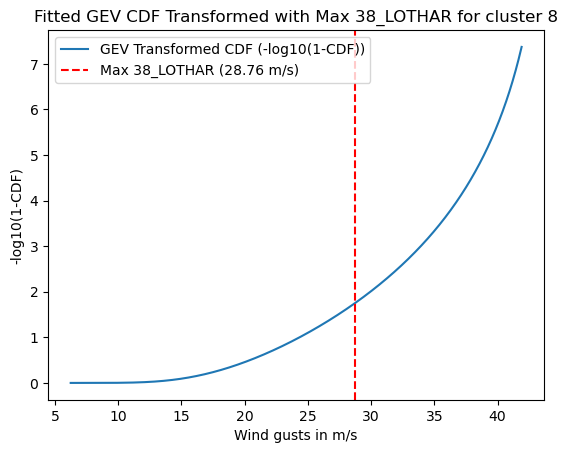

Return Period of Max 38_LOTHAR Wind Gust: 2.34 years for cluster 9


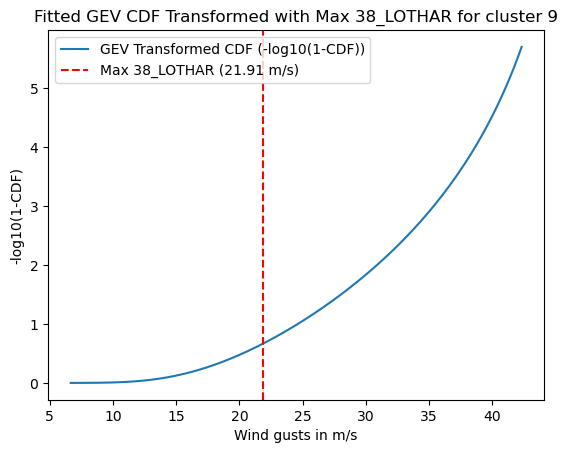

Return Period of Max 38_LOTHAR Wind Gust: 5.00 years for cluster 10


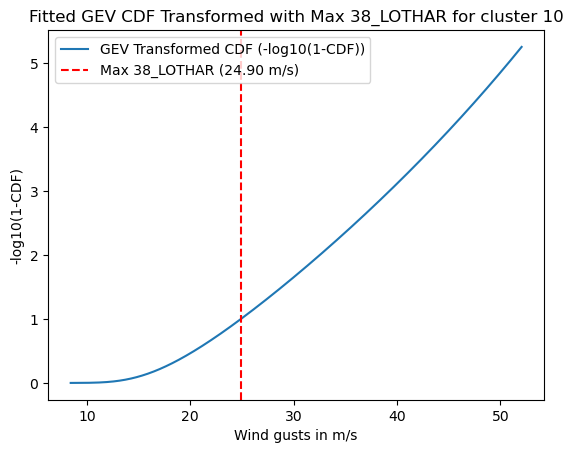

Return Period of Max 38_LOTHAR Wind Gust: 5.59 years for cluster 11


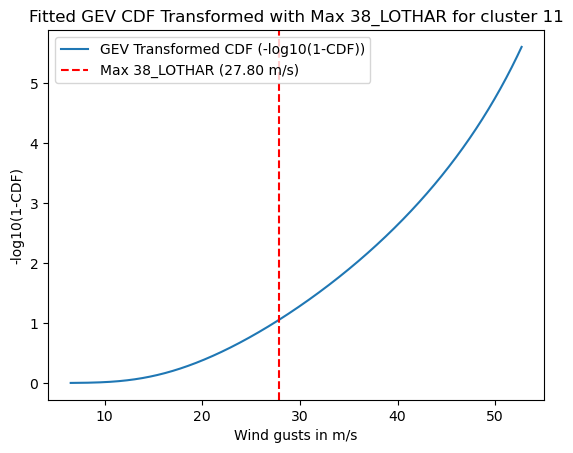

Return Period of Max 38_LOTHAR Wind Gust: 2.61 years for cluster 12


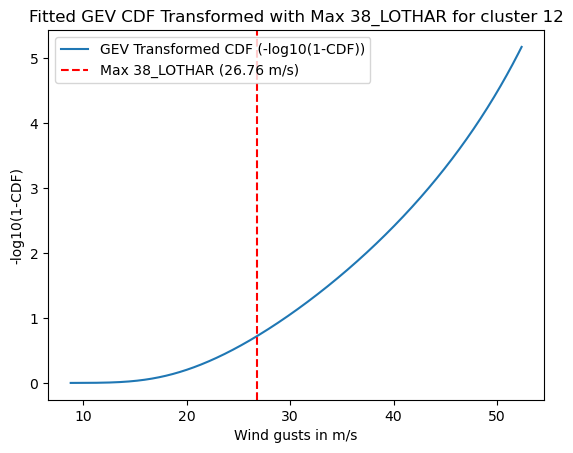

Return Period of Max 38_LOTHAR Wind Gust: 6.53 years for cluster 13


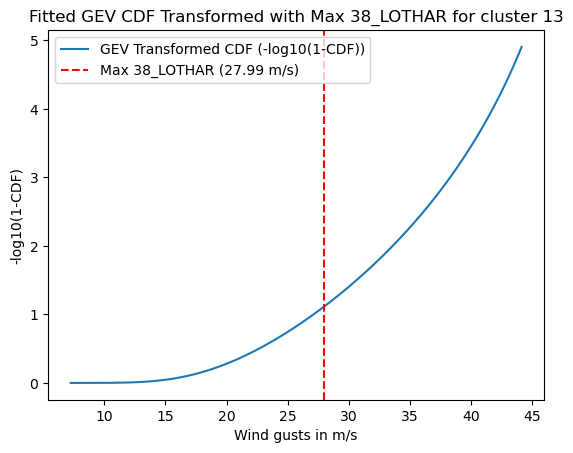

Return Period of Max 38_LOTHAR Wind Gust: 25.67 years for cluster 14


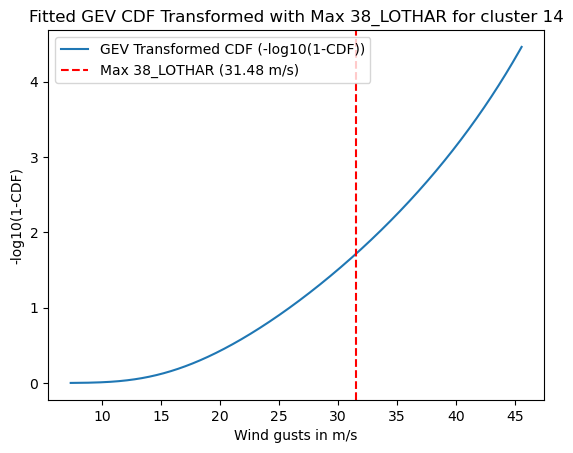

In [ ]:
datasets_winter = []
months = [10, 11, 12, 1, 2, 3]
days = np.arange(1, 32)

# storm event

event = '38_LOTHAR'

# cluster data

tif_15 = xr.open_dataset('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.tif',
                         engine='rasterio')
tif_15 = tif_15.rename({'x': 'longitude', 'y': 'latitude'})

# storm data

cluster_data_original = pd.read_csv('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.csv')
vivian = data_processing.process_daily_climatology(f'data/time_series_rasters_storms_15h/{event}.tif', cluster_data_original, 'VIVIAN')

# climatology data

for month in months:
    for day in days:
        try:
            dataset = depickle(f'data/climatology/daily_winter_season/climatology_europe_winter_{month}_{day}.pkl')
            datasets_winter.append(dataset)
        except:
            print(f'No data for month {month} and day {day}')

# tests for each cluster of storm Vivian

clusters = range(0, 15)
log_cdf_max = pd.DataFrame()

#cluster_n = 4
for cluster_n in clusters:
    #return_periods[f'cluster_{cluster_n}'] = []
    dataset_wind_speed = []
    for dataset in datasets_winter:
        for ds in dataset:
            ds_cluster = ds.where(tif_15['band_data'] == cluster_n)
            # extract the wind speed data
            #wind_speed = ds_cluster['i10fg']
            #wind_values = wind_speed.values[~np.isnan(wind_speed.values)]
            daily_max = ds_cluster['i10fg'].max().values
            #dataset_wind_speed.extend(daily_max)  # Append values directly into the single list
            dataset_wind_speed.append(daily_max)
        # change the dataset_wind_speed to a dataframe along one column
        #df_wind_speed = pd.DataFrame(dataset_wind_speed)
        #df_wind_speed = df_wind_speed.T

    #dataset_wind_speed = pd.DataFrame(round(pd.DataFrame(dataset_wind_speed)[0],2))#(pd.unique(round(pd.DataFrame(dataset_wind_speed)[0],2)))
    #dataset_wind_speed.to_csv('data/climatology/daily_winter_season/wind_speed_cluster_3_mostly_winter_rounded.csv')

    technic = genextreme
    # Fit the GEV distribution
    shape, loc, scale = technic.fit(dataset_wind_speed)

    vivian_subset = vivian[vivian['cluster_n'] == cluster_n]['wind_speed_None']
    max_vivian = vivian_subset.max()

    # Compute return period for max_vivian
    cdf_max_vivian = technic.cdf(max_vivian, shape, loc=loc, scale=scale)
    return_period = round((1 / (1 - cdf_max_vivian))/2,2)
    log_cdf_max_vivian = -np.log(1 - cdf_max_vivian)
    log_cdf_max.at[event, f'cluster_{cluster_n}'] = log_cdf_max_vivian
    print(f"Return Period of Max {event} Wind Gust: {return_period:.2f} years for cluster {cluster_n}")

    x_vals = np.linspace(min(dataset_wind_speed), max(dataset_wind_speed), 1000)
    cdf_vals = technic.cdf(x_vals, shape, loc=loc, scale=scale)

    # Transform CDF to -log10(1-CDF)
    cdf_vals_transformed = -np.log10(1 - cdf_vals)

    # Plot the transformed CDF
    plt.plot(x_vals, cdf_vals_transformed, label="GEV Transformed CDF (-log10(1-CDF))")
    plt.axvline(max_vivian, color='red', linestyle='--', label=f"Max {event} ({max_vivian:.2f} m/s)")
    plt.legend()
    plt.title(f"Fitted GEV CDF Transformed with Max {event} for cluster {cluster_n}")
    plt.xlabel("Wind gusts in m/s")
    plt.ylabel("-log10(1-CDF)")
    plt.show()


9_C3S_STORM_TRACKS_ERA5
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 2.22 years for cluster 0
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.75 years for cluster 1
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.73 years for cluster 2
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 3.46 years for cluster 3
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.01 years for cluster 4
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.10 years for cluster 5
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 95.08 years for cluster 6
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 4.03 years for cluster 7
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.60 years for cluster 8
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.91 years for cluster 9
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.20 years for cluster 10
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.97 years for cluster 11
R

KeyboardInterrupt: 

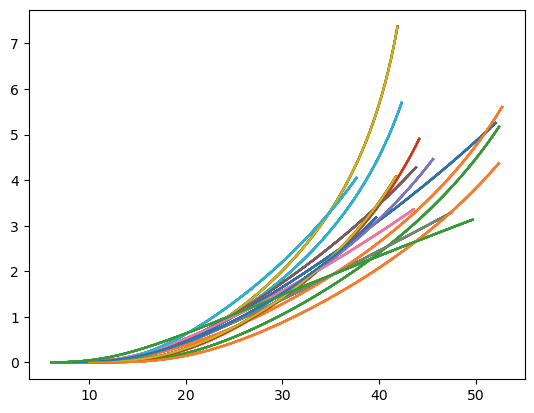

In [176]:
import glob


path = '/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/data/time_series_rasters_storms_15h/'
files = glob.glob(path + '*.tif')
name_tif = [os.path.basename(file) for file in files]
# remove max_all_storms.tif
name_tif.remove('max_all_storms.tif')
for file in name_tif:
    event = file.split('.')[0]
    print(event)
    # storm data
    cluster_data_original = pd.read_csv('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.csv')
    storm = data_processing.process_daily_climatology(f'data/time_series_rasters_storms_15h/{event}.tif', cluster_data_original, event)
    # tests for each cluster of storm Vivian
    clusters = range(0, 15)
    log_cdf_max = pd.DataFrame()
    for cluster_n in clusters:
        dataset_wind_speed = []
        for dataset in datasets_winter:
            for ds in dataset:
                ds_cluster = ds.where(tif_15['band_data'] == cluster_n)
                daily_max = ds_cluster['i10fg'].max().values
                dataset_wind_speed.append(daily_max)
        technic = genextreme
        # Fit the GEV distribution
        shape, loc, scale = technic.fit(dataset_wind_speed)
        storm_subset = storm[storm['cluster_n'] == cluster_n]['wind_speed_None']
        max_storm = storm_subset.max()
        # Compute return period for max_vivian
        cdf_max_storm = technic.cdf(max_storm, shape, loc=loc, scale=scale)
        return_period = round((1 / (1 - cdf_max_storm))/2,2)
        log_cdf_max_storm = -np.log(1 - cdf_max_storm)
        log_cdf_max.at[event, f'cluster_{cluster_n}'] = log_cdf_max_storm
        print(f"Return Period of Max {event} Wind Gust: {return_period:.2f} years for cluster {cluster_n}")

        x_vals = np.linspace(min(dataset_wind_speed), max(dataset_wind_speed), 1000)
        cdf_vals = technic.cdf(x_vals, shape, loc=loc, scale=scale)

        # Transform CDF to -log10(1-CDF)
        cdf_vals_transformed = -np.log10(1 - cdf_vals)

        # Plot the transformed CDF
        #plt.plot(x_vals, cdf_vals_transformed, label="GEV Transformed CDF (-log10(1-CDF)")

In [2]:
import os
import glob
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import xarray as xr
from scipy.stats import genextreme
import matplotlib.pyplot as plt

# TAKES 17 MINUTES TO RUN

def initialize_datasets_winter(months, days):
    datasets_winter = []
    for month in months:
        for day in days:
            try:
                dataset = depickle(f'data/climatology/daily_winter_season/climatology_europe_winter_{month}_{day}.pkl')
                datasets_winter.append(dataset)
            except FileNotFoundError:
                print(f'No data for month {month} and day {day}')
    return datasets_winter

def process_storm_file(event, cluster_data_original, datasets_winter, tif_15):
    print(f"Processing event: {event}")
    
    # Storm data
    storm = data_processing.process_daily_climatology(
        f'data/time_series_rasters_storms_15h/{event}.tif', 
        cluster_data_original, 
        event
    )
    
    clusters = range(0, 15)
    log_cdf_max = pd.DataFrame()
    
    for cluster_n in clusters:
        dataset_wind_speed = []
        for dataset in datasets_winter:
            for ds in dataset:
                ds_cluster = ds.where(tif_15['band_data'] == cluster_n)
                daily_max = ds_cluster['i10fg'].max().values
                dataset_wind_speed.append(daily_max)
                
        technic = genextreme
        # Fit the GEV distribution
        shape, loc, scale = technic.fit(dataset_wind_speed)
        storm_subset = storm[storm['cluster_n'] == cluster_n]['wind_speed_None']
        max_storm = storm_subset.max()
        # Compute return period for max_storm
        cdf_max_storm = technic.cdf(max_storm, shape, loc=loc, scale=scale)
        return_period = round((1 / (1 - cdf_max_storm)) / 2, 2)
        log_cdf_max_storm = -np.log(1 - cdf_max_storm)
        log_cdf_max.at[event, f'cluster_{cluster_n}'] = log_cdf_max_storm
        print(f"Return Period of Max {event} Wind Gust: {return_period:.2f} years for cluster {cluster_n}")

        x_vals = np.linspace(min(dataset_wind_speed), max(dataset_wind_speed), 1000)
        cdf_vals = technic.cdf(x_vals, shape, loc=loc, scale=scale)

        # Transform CDF to -log10(1-CDF)
        cdf_vals_transformed = -np.log10(1 - cdf_vals)

        # Optional: Plot the transformed CDF
        # plt.plot(x_vals, cdf_vals_transformed, label="GEV Transformed CDF (-log10(1-CDF)")

    return log_cdf_max

def main_joblib_parallel_processing(path, cluster_csv, months, days, tif_15, n_jobs=-1):
    # Collect all storm files
    files = glob.glob(os.path.join(path, '*.tif'))
    name_tif = [os.path.basename(file) for file in files]
    # Remove 'max_all_storms.tif'
    if 'max_all_storms.tif' in name_tif:
        name_tif.remove('max_all_storms.tif')

    # Load cluster data
    cluster_data_original = pd.read_csv(cluster_csv)

    # Initialize datasets_winter
    datasets_winter = initialize_datasets_winter(months, days)

    # Run tasks in parallel using joblib
    results = Parallel(n_jobs=n_jobs)(
        delayed(process_storm_file)(file.split('.')[0], cluster_data_original, datasets_winter, tif_15) 
        for file in name_tif
    )
    
    # Combine results
    log_cdf_max_combined = pd.concat(results)
    return log_cdf_max_combined

# Prepare data for processing
tif_15 = xr.open_dataset('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.tif', engine='rasterio')
tif_15 = tif_15.rename({'x': 'longitude', 'y': 'latitude'})

path = '/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/data/time_series_rasters_storms_15h/'
cluster_csv = 'pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.csv'
months = [10, 11, 12, 1, 2, 3]  # Winter months
days = range(1, 32)  # Days from 01 to 31

# Process all storms in parallel
log_cdf_max_combined = main_joblib_parallel_processing(path, cluster_csv, months, days, tif_15, n_jobs=-1)

No data for month 11 and day 31
No data for month 2 and day 30
No data for month 2 and day 31
Processing event: 9_C3S_STORM_TRACKS_ERA5
Processing event: 35_C3S_STORM_TRACKS_ERA5
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 2.22 years for cluster 0
Processing event: 82_C3S_STORM_TRACKS_ERA5
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.75 years for cluster 1
Return Period of Max 35_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.56 years for cluster 0
Processing event: 1_C3S_STORM_TRACKS_ERA5
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.73 years for cluster 2
Return Period of Max 35_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.02 years for cluster 1
Return Period of Max 82_C3S_STORM_TRACKS_ERA5 Wind Gust: 4.84 years for cluster 0
Return Period of Max 9_C3S_STORM_TRACKS_ERA5 Wind Gust: 3.46 years for cluster 3
Return Period of Max 35_C3S_STORM_TRACKS_ERA5 Wind Gust: 2.40 years for cluster 2
Processing event: 13_C3S_STORM_TRACKS_ERA5
Return Period of Max 82_C3S_STORM_TRACKS_

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Return Period of Max 25_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.58 years for cluster 2
Return Period of Max 52_C3S_STORM_TRACKS_ERA5 Wind Gust: 28.71 years for cluster 0
Return Period of Max 55_C3S_STORM_TRACKS_ERA5 Wind Gust: 2.06 years for cluster 7
Return Period of Max 37_ANATOL Wind Gust: 17.12 years for cluster 12
Return Period of Max 64_KLAUS Wind Gust: 1.81 years for cluster 10
Processing event: 93_DENNIS
Return Period of Max 22_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.51 years for cluster 5
Return Period of Max 25_C3S_STORM_TRACKS_ERA5 Wind Gust: 5.52 years for cluster 3
Return Period of Max 52_C3S_STORM_TRACKS_ERA5 Wind Gust: 2.54 years for cluster 1
Return Period of Max 55_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.79 years for cluster 8
Return Period of Max 37_ANATOL Wind Gust: 0.51 years for cluster 13
Return Period of Max 64_KLAUS Wind Gust: 1.58 years for cluster 11
Return Period of Max 22_C3S_STORM_TRACKS_ERA5 Wind Gust: 52.83 years for cluster 6
Return Period of Max 25_C3S_STORM_TRACKS_ER

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Return Period of Max 16_C3S_STORM_TRACKS_ERA5 Wind Gust: 5.36 years for cluster 10
Return Period of Max 4_C3S_STORM_TRACKS_ERA5 Wind Gust: 56.06 years for cluster 12
Processing event: 69_C3S_STORM_TRACKS_ERA5
Return Period of Max 21_LORE Wind Gust: 1.79 years for cluster 5
Return Period of Max 5_VIVIAN Wind Gust: 1.93 years for cluster 8
Return Period of Max 87_C3S_STORM_TRACKS_ERA5 Wind Gust: 22.51 years for cluster 3
Return Period of Max 30_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.65 years for cluster 1
Return Period of Max 16_C3S_STORM_TRACKS_ERA5 Wind Gust: 321.82 years for cluster 11
Return Period of Max 4_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.69 years for cluster 13
Return Period of Max 21_LORE Wind Gust: 11.48 years for cluster 6
Return Period of Max 5_VIVIAN Wind Gust: 0.61 years for cluster 9
Return Period of Max 87_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.69 years for cluster 4
Return Period of Max 30_C3S_STORM_TRACKS_ERA5 Wind Gust: 4.98 years for cluster 2
Return Period of Max 16_C3S_STOR

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Return Period of Max 53_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.63 years for cluster 8
Return Period of Max 40_MARTIN Wind Gust: 13.12 years for cluster 6
Return Period of Max 23_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.76 years for cluster 4
Return Period of Max 54_KYRILL Wind Gust: 0.88 years for cluster 12
Return Period of Max 72_C3S_STORM_TRACKS_ERA5 Wind Gust: 61.98 years for cluster 2
Return Period of Max 24_C3S_STORM_TRACKS_ERA5 Wind Gust: 76.65 years for cluster 10
Return Period of Max 10_C3S_STORM_TRACKS_ERA5 Wind Gust: 17.89 years for cluster 0
Return Period of Max 53_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.62 years for cluster 9
Return Period of Max 40_MARTIN Wind Gust: 126.91 years for cluster 7
Return Period of Max 23_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.52 years for cluster 5
Return Period of Max 24_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.70 years for cluster 11
Return Period of Max 72_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.53 years for cluster 3
Return Period of Max 54_KYRILL Wind Gust: 1.15 years

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Return Period of Max 96_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.66 years for cluster 0
Return Period of Max 62_C3S_STORM_TRACKS_ERA5 Wind Gust: 2.09 years for cluster 12
Return Period of Max 51_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.51 years for cluster 7
Processing event: 56_C3S_STORM_TRACKS_ERA5
Return Period of Max 26_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.59 years for cluster 5
Return Period of Max 77_C3S_STORM_TRACKS_ERA5 Wind Gust: 42.41 years for cluster 10
Return Period of Max 96_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.67 years for cluster 1
Return Period of Max 78_C3S_STORM_TRACKS_ERA5 Wind Gust: 9.50 years for cluster 3
Return Period of Max 51_C3S_STORM_TRACKS_ERA5 Wind Gust: 1.59 years for cluster 8
Return Period of Max 62_C3S_STORM_TRACKS_ERA5 Wind Gust: 0.92 years for cluster 13
Return Period of Max 26_C3S_STORM_TRACKS_ERA5 Wind Gust: 3.17 years for cluster 6
Return Period of Max 77_C3S_STORM_TRACKS_ERA5 Wind Gust: 3.05 years for cluster 11
Return Period of Max 78_C3S_STORM_TRACKS_ERA5 Wind

In [44]:
# split the index into two columns, one for the storm number and the other one for the storm name
#log_cdf_max_combined = pd.read_csv('data\climatology\daily_winter_season\log_cdf_max_combined.csv', delimiter=',')
test_y = log_cdf_max_combined.reset_index()
test_y[['storm_number', 'storm_name']] = test_y['Unnamed: 0'].str.split('_',n=1,  expand=True)

# drop the Unnamed: 0 column
test_y = test_y.drop(columns=['Unnamed: 0', 'index'])

# Place the columns storm_number and storm_name at the beginning of the dataframe
cols = test_y.columns.tolist()
cols = cols[-2:] + cols[:-2]
test_y = test_y[cols]

test_y.to_csv('data/climatology/daily_winter_season/log_cdf_max_combined.csv')
# save in the folder of the nestedMLR
test_y.to_csv(r'pre_processing\nestedMLR/log_cdf_max_combined.csv')

# change type of storm_number to int
test_y['storm_number'] = test_y['storm_number'].astype(int)
# split the log_cdf_max_combined into 3 separate dataframes, one for trainings, one for validations and one for tests
storm_training_test_valid = pd.read_csv('pre_processing/time_series_i10fg_before_eu/storm_training_test_valid.csv',
                                        delimiter=';')

# create a dataframe for the training data
log_cdf_max_training = test_y[test_y['storm_number'].isin(storm_training_test_valid['training'])]
log_cdf_max_training = log_cdf_max_training.drop(columns=['storm_name'])

# create a dataframe for the validation data
log_cdf_max_validation = test_y[test_y['storm_number'].isin(storm_training_test_valid['validation'])]
log_cdf_max_validation = log_cdf_max_validation.drop(columns=['storm_name'])

# create a dataframe for the test data
log_cdf_max_test = test_y[test_y['storm_number'].isin(storm_training_test_valid['test'])]
log_cdf_max_test = log_cdf_max_test.drop(columns=['storm_name'])
#log_cdf_max_combined = log_cdf_max_combined.reset_index()
#log_cdf_max_combined = log_cdf_max_combined.rename(columns={'index': 'storm_name'})
#log_cdf_max_combihned = log_cdf_max_combined.merge(storm_training_test_valid, on='storm_name')
#log_cdf_max_combined = log_cdf_max_combined.set_index('storm_name')

log_cdf_max_training.to_csv('data/climatology/daily_winter_season/log_cdf_max_training.csv')
log_cdf_max_validation.to_csv('data/climatology/daily_winter_season/log_cdf_max_validation.csv')
log_cdf_max_test.to_csv('data/climatology/daily_winter_season/log_cdf_max_test.csv')

log_cdf_max_training.to_csv(r'pre_processing\nestedMLR/log_cdf_max_training.csv')
log_cdf_max_validation.to_csv(r'pre_processing\nestedMLR/log_cdf_max_validation.csv')
log_cdf_max_test.to_csv(r'pre_processing\nestedMLR/log_cdf_max_test.csv')

#log_cdf_max_combined.to_csv('data/climatology/daily_winter_season/log_cdf_max_combined.csv')

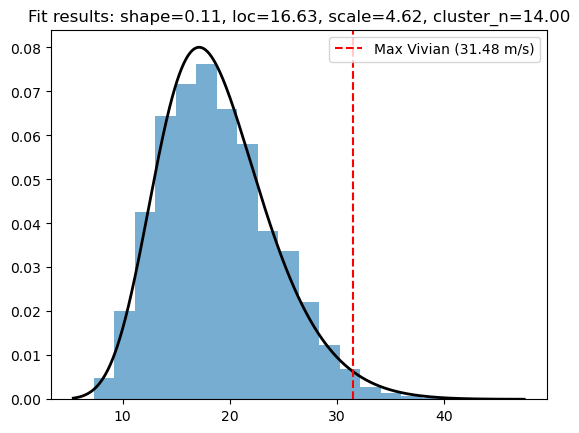

0.9805186382572166
0.9999820214081453
Return Period of Max Vivian Wind Gust: 25.67 years


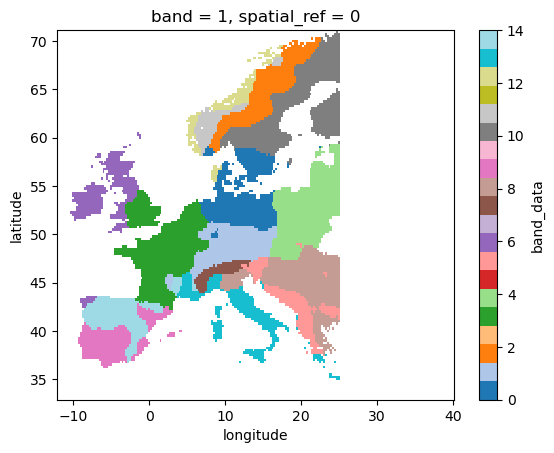

In [169]:
# plot the distribution
fig, ax = plt.subplots()
ax.hist(dataset_wind_speed, bins=20, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = technic.pdf(x, shape, loc, scale)
cdf = technic.cdf(x, shape, loc, scale)
ax.plot(x, p, 'k', linewidth=2)
#ax2 = ax.twinx()
#ax2.plot(x, cdf, 'r', linewidth=2)
plt.axvline(max_vivian, color='red', linestyle='--', label=f"Max Vivian ({max_vivian:.2f} m/s)")
plt.legend()
title = "Fit results: shape=%.2f, loc=%.2f, scale=%.2f, cluster_n=%.2f" % (shape, loc, scale, cluster_n)
ax.set_title(title)

plt.show()

# Compute return period for max_vivian
cdf_max_vivian = technic.cdf(max_vivian, shape, loc=loc, scale=scale)
return_period = (1 / (1 - cdf_max_vivian))/2

print(cdf_max_vivian)
print(0.9999820214081453)
print(f"Return Period of Max Vivian Wind Gust: {return_period:.2f} years")

tif_15['band_data'].plot(cmap='tab20')

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

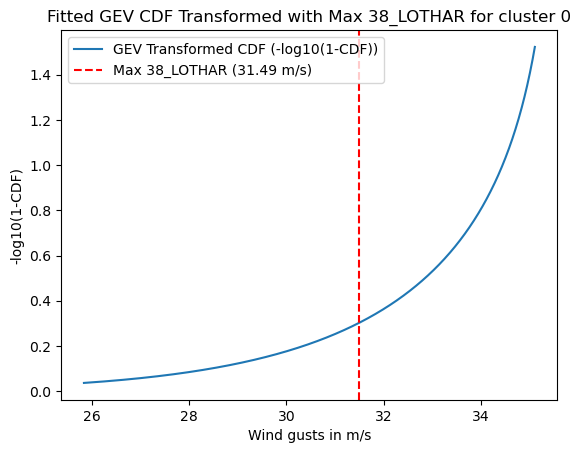

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

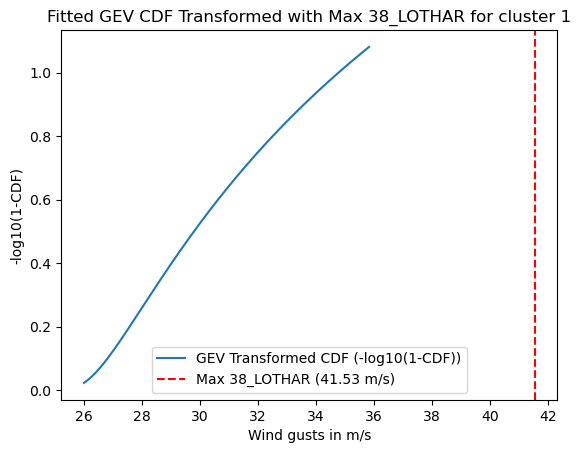

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

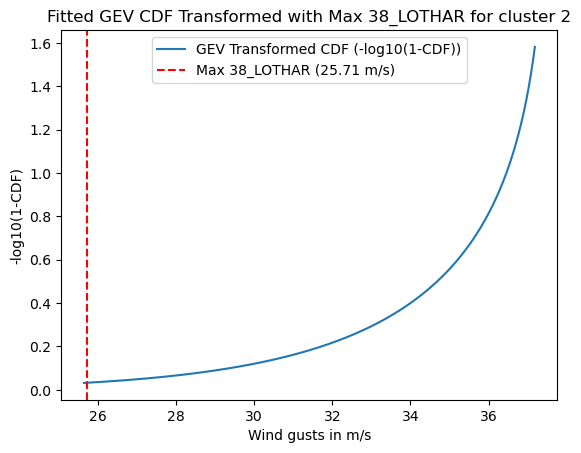

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3350/4155734951.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  return_period = round((1 / (1 - cdf_max_vivian))/2,2)


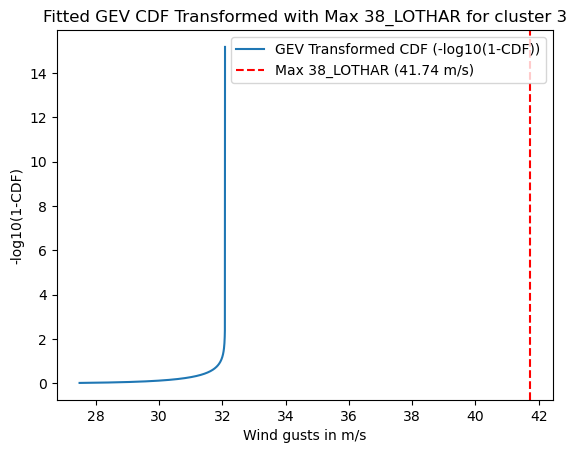

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

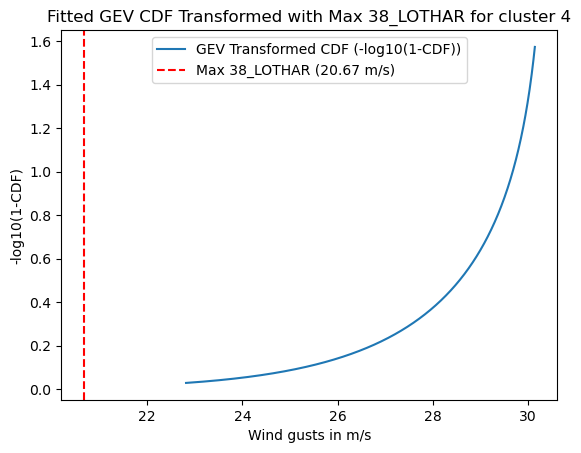

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

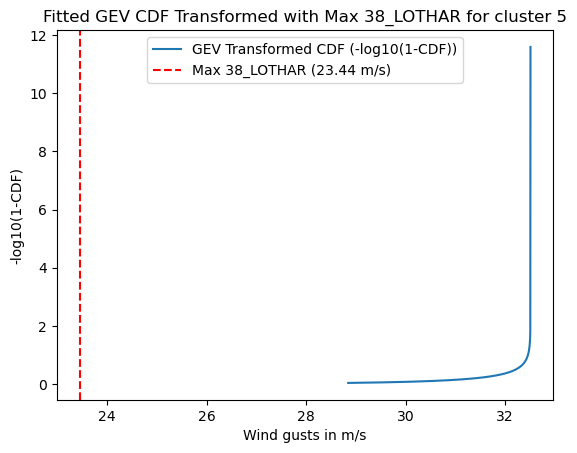

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

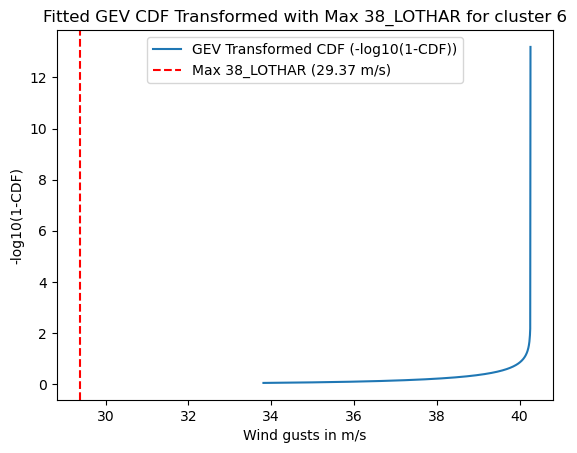

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

/var/folders/01/5ryz4pnn581dj9gk6r1nn5qr0000gn/T/ipykernel_3350/4155734951.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  return_period = round((1 / (1 - cdf_max_vivian))/2,2)


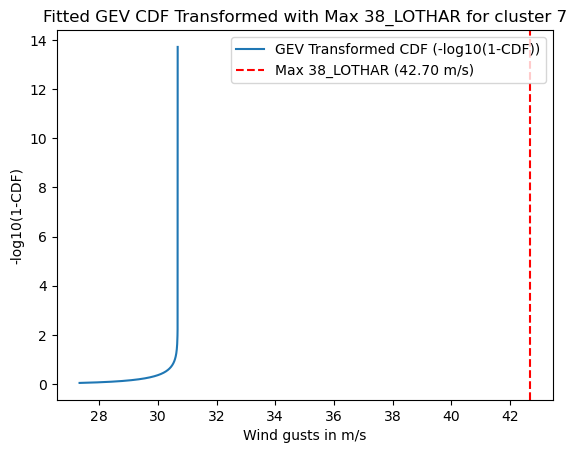

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

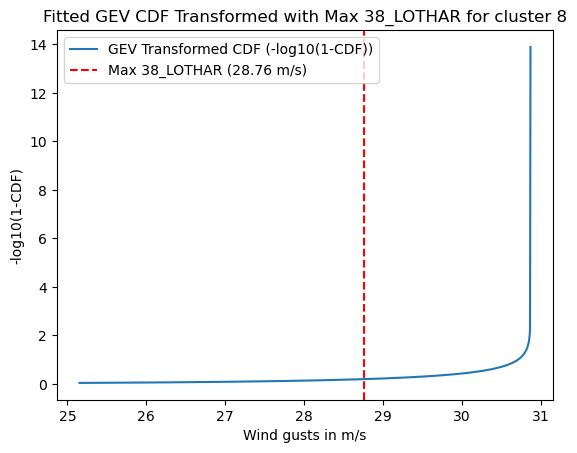

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

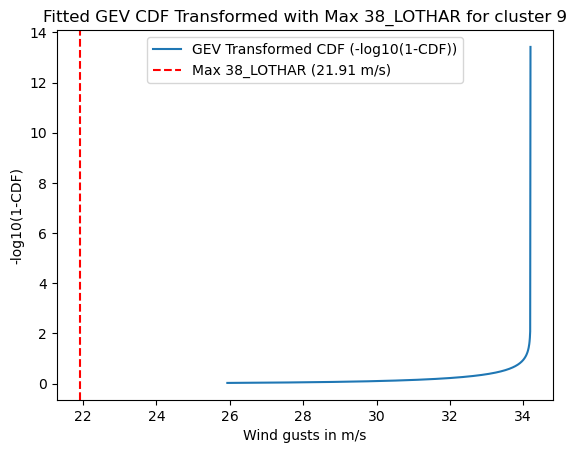

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

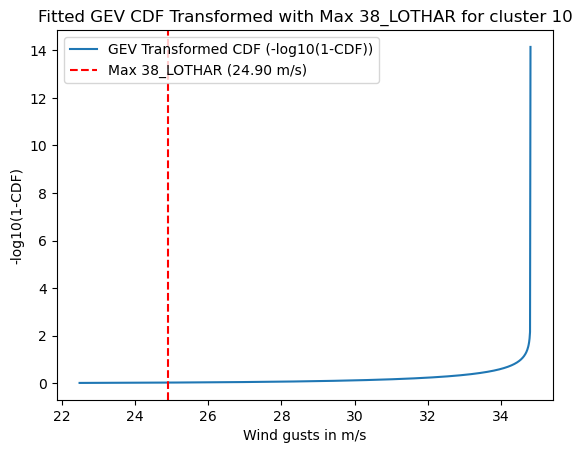

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

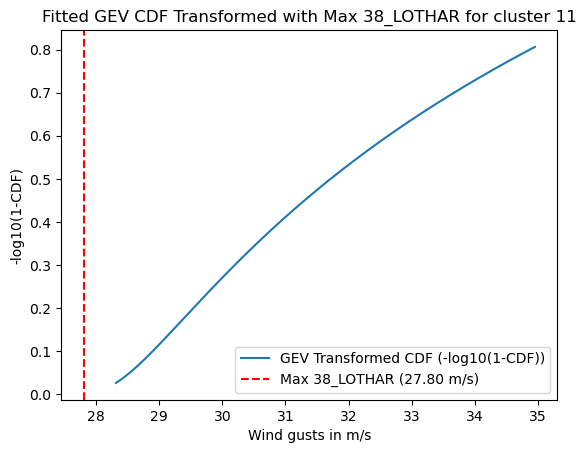

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

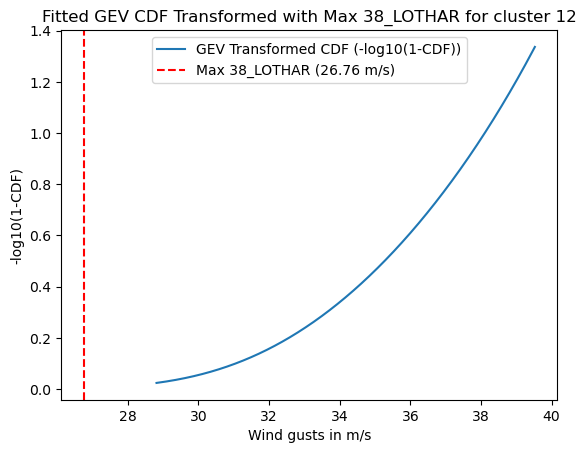

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

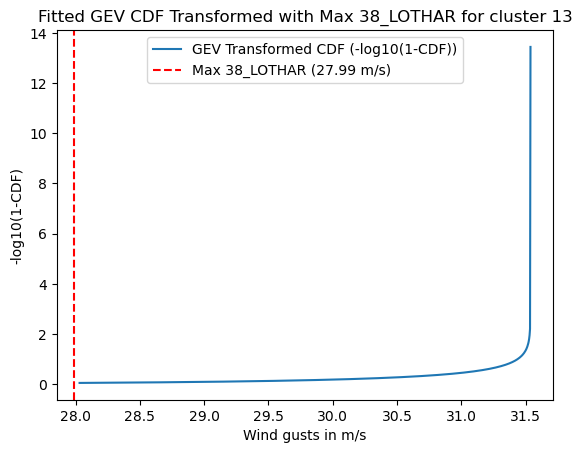

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 10
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
No data for month 11 and day 31
month 11
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 12
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27
day 28
day 29
day 30
day 31
month 1
day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 1

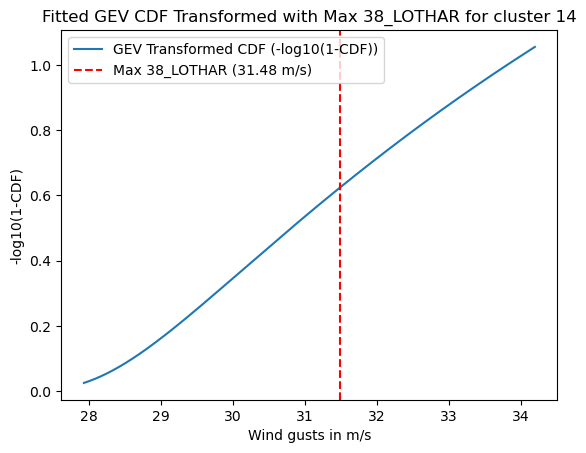

In [167]:
datasets_winter = []
months = [10, 11, 12, 1, 2, 3]
days = np.arange(1, 32)

# storm event

event = '38_LOTHAR'

# cluster data

tif_15 = xr.open_dataset('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.tif',
                         engine='rasterio')
tif_15 = tif_15.rename({'x': 'longitude', 'y': 'latitude'})
clusters = range(0, 15)

# storm data

cluster_data_original = pd.read_csv('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.csv')
vivian = data_processing.process_daily_climatology(f'data/time_series_rasters_storms_15h/{event}.tif', cluster_data_original, 'VIVIAN')

# climatology data

for cluster_n in clusters:
    dataset_wind_speed = []

    for month in months:
        datasets_winter = []
        for day in days:
            #print('day', day)
            try:
                dataset_raw = depickle(f'data/climatology/daily_winter_season/climatology_europe_winter_{month}_{day}.pkl')
                temp = dataset_raw[0]
                for ds in dataset_raw:
                    temp = xr.concat([temp, ds], dim='band') 
            except:
                    print(f'No data for month {month} and day {day}')
        #print('month', month)
        dataset_wind_speed_temp = []
        ds_max_daily = temp['i10fg'].max(dim='band')
        ds_cluster = ds_max_daily.where(tif_15['band_data'] == cluster_n)
            
        monthly_max = ds_cluster.max().values
        #dataset_wind_speed.extend(daily_max)  # Append values directly into the single list
        dataset_wind_speed.append(monthly_max)
                    
    technic = genextreme
    # Fit the GEV distribution
    shape, loc, scale = technic.fit(dataset_wind_speed)

    vivian_subset = vivian[vivian['cluster_n'] == cluster_n]['wind_speed_None']
    max_vivian = vivian_subset.max()

    # Compute return period for max_vivian
    cdf_max_vivian = technic.cdf(max_vivian, shape, loc=loc, scale=scale)
    return_period = round((1 / (1 - cdf_max_vivian))/2,2)
    return_periods.append(return_period)
    print(f"Return Period of Max {event} Wind Gust: {return_period:.2f} years for cluster {cluster_n}")

    x_vals = np.linspace(min(dataset_wind_speed), max(dataset_wind_speed), 1000)
    cdf_vals = technic.cdf(x_vals, shape, loc=loc, scale=scale)

    # Transform CDF to -log10(1-CDF)
    cdf_vals_transformed = -np.log10(1 - cdf_vals)

    # Plot the transformed CDF
    plt.plot(x_vals, cdf_vals_transformed, label="GEV Transformed CDF (-log10(1-CDF))")
    plt.axvline(max_vivian, color='red', linestyle='--', label=f"Max {event} ({max_vivian:.2f} m/s)")
    plt.legend()
    plt.title(f"Fitted GEV CDF Transformed with Max {event} for cluster {cluster_n}")
    plt.xlabel("Wind gusts in m/s")
    plt.ylabel("-log10(1-CDF)")
    plt.show()


In [120]:
test_1 = dataset[0]
#test_1 = xr.Dataset({'i10fg': (('latitude', 'longitude'), np.random.rand(100, 100))},
                    #coords={'latitude': np.linspace(0, 10, 100),
                     #       'longitude': np.linspace(0, 10, 100)})
test_2 = dataset[1]
test_3 = dataset[2]

test_1_2 = xr.concat([test_1, test_2], dim='band')
test_1_2 = xr.concat([test_1_2, test_3], dim='band')
test_1_2

test_max = test_1_2.max(dim='band')
test_max_cluster = test_max.where(tif_15['band_data'] == 3)
test_max_cluster['i10fg'].max().values

KeyError: 0

In [ ]:
# STATISTCIAL TESTS

# Compare GEV CDF to empirical CDF (they must be close)
# Use scikit and then seaborn for empirical CDF

